Epoch 0: Loss = 1.0985, Accuracy = 0.5333
Epoch 50: Loss = 1.0431, Accuracy = 0.6583
Epoch 100: Loss = 0.5751, Accuracy = 0.7667
Epoch 150: Loss = 0.3896, Accuracy = 0.8500
Epoch 200: Loss = 0.2933, Accuracy = 0.9083
Epoch 250: Loss = 0.2277, Accuracy = 0.9333
Epoch 300: Loss = 0.1786, Accuracy = 0.9667
Epoch 350: Loss = 0.1433, Accuracy = 0.9583
Epoch 400: Loss = 0.1196, Accuracy = 0.9583
Epoch 450: Loss = 0.1037, Accuracy = 0.9583


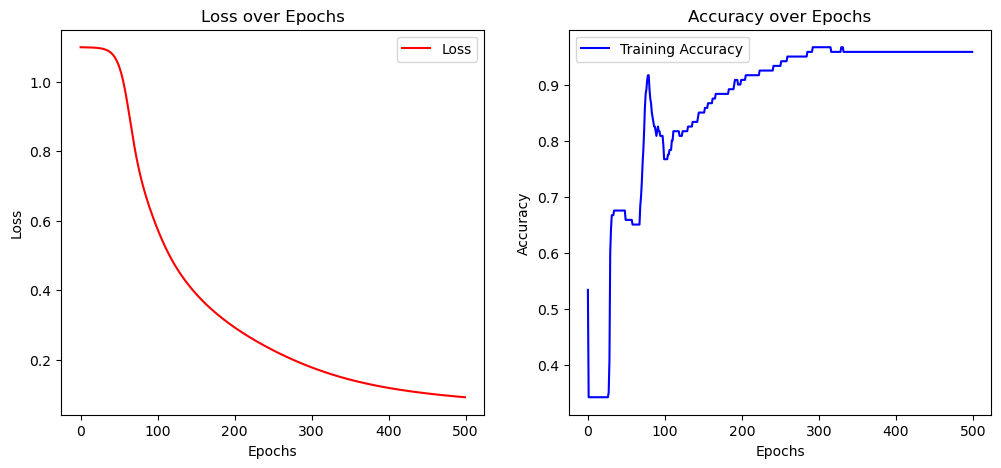

Test Accuracy: 100.00%

Training with Stochastic Gradient Descent (SGD)
Epoch 0: Loss = 0.0916, Accuracy = 0.9583
Epoch 50: Loss = 0.0621, Accuracy = 0.9667
Epoch 100: Loss = 0.0548, Accuracy = 0.9750
Epoch 150: Loss = 0.0516, Accuracy = 0.9833
Epoch 200: Loss = 0.0500, Accuracy = 0.9833
Epoch 250: Loss = 0.0491, Accuracy = 0.9833
Epoch 300: Loss = 0.0485, Accuracy = 0.9833
Epoch 350: Loss = 0.0482, Accuracy = 0.9833
Epoch 400: Loss = 0.0479, Accuracy = 0.9833
Epoch 450: Loss = 0.0478, Accuracy = 0.9833


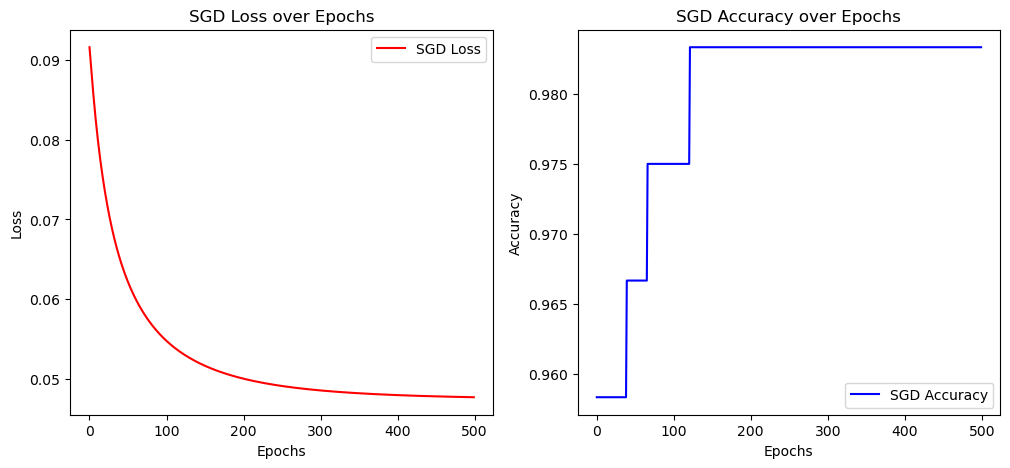

Test Accuracy with SGD: 100.00%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load dataset
iris = load_iris()
X = iris.data  # Features (4 input features)
Y = iris.target.reshape(-1, 1)  # Labels (3 classes)

# One-hot encoding for multi-class classification
ohe = OneHotEncoder(sparse_output=False)
Y = ohe.fit_transform(Y)  # Converts class labels to one-hot encoded format

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define network architecture
input_size = X.shape[1]  # 4 input features
hidden_size = 10  # Hidden layer neurons
output_size = Y.shape[1]  # 3 output classes
learning_rate = 0.1
epochs = 500
batch_size = 16  # For Stochastic Gradient Descent

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
B1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
B2 = np.zeros((1, output_size))

# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Loss function
def compute_loss(Y_true, Y_pred):
    m = Y_true.shape[0]
    return -np.sum(Y_true * np.log(Y_pred + 1e-9)) / m  # Adding small value for stability

# Forward propagation
def forward_propagation(X):
    Z1 = np.dot(X, W1) + B1
    A1 = relu(Z1)  # Hidden layer activation
    Z2 = np.dot(A1, W2) + B2
    A2 = softmax(Z2)  # Output layer activation
    return Z1, A1, Z2, A2

# Backward propagation
def backward_propagation(X, Y, Z1, A1, Z2, A2):
    global W1, B1, W2, B2

    m = X.shape[0]

    # Output layer error
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    dB2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Hidden layer error
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    dB1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Gradient descent update
    W2 -= learning_rate * dW2
    B2 -= learning_rate * dB2
    W1 -= learning_rate * dW1
    B1 -= learning_rate * dB1

# Training loop with batch gradient descent
losses = []
accuracies = []

for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train)
    loss = compute_loss(Y_train, A2)
    backward_propagation(X_train, Y_train, Z1, A1, Z2, A2)

    # Compute accuracy
    predictions = np.argmax(A2, axis=1)
    actual = np.argmax(Y_train, axis=1)
    accuracy = np.mean(predictions == actual)

    losses.append(loss)
    accuracies.append(accuracy)

    if epoch % 50 == 0:
        print(f'Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}')

# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, label="Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label="Training Accuracy", color='blue')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.show()

# Test the model
Z1, A1, Z2, A2 = forward_propagation(X_test)
predictions = np.argmax(A2, axis=1)
actual = np.argmax(Y_test, axis=1)
test_accuracy = np.mean(predictions == actual)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# ---------------------------
# Stochastic Gradient Descent (SGD) Implementation
# ---------------------------
print("\nTraining with Stochastic Gradient Descent (SGD)")

losses_sgd = []
accuracies_sgd = []

for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):  # Mini-batch iteration
        X_batch = X_train[i:i + batch_size]
        Y_batch = Y_train[i:i + batch_size]

        Z1, A1, Z2, A2 = forward_propagation(X_batch)
        backward_propagation(X_batch, Y_batch, Z1, A1, Z2, A2)

    # Evaluate after epoch
    Z1, A1, Z2, A2 = forward_propagation(X_train)
    loss = compute_loss(Y_train, A2)
    predictions = np.argmax(A2, axis=1)
    actual = np.argmax(Y_train, axis=1)
    accuracy = np.mean(predictions == actual)

    losses_sgd.append(loss)
    accuracies_sgd.append(accuracy)

    if epoch % 50 == 0:
        print(f'Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}')

# Plot Loss and Accuracy for SGD
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses_sgd, label="SGD Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD Loss over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies_sgd, label="SGD Accuracy", color='blue')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("SGD Accuracy over Epochs")
plt.legend()

plt.show()

# Test accuracy after SGD training
Z1, A1, Z2, A2 = forward_propagation(X_test)
predictions = np.argmax(A2, axis=1)
actual = np.argmax(Y_test, axis=1)
test_accuracy_sgd = np.mean(predictions == actual)
print(f'Test Accuracy with SGD: {test_accuracy_sgd * 100:.2f}%')
